# **Calculate Course Similarity using BoW Features**

Similarity measurement between items is the foundation of many recommendation algorithms, especially for content-based recommendation algorithms. For example, if a new course is similar to user's enrolled courses, we could recommend that new similar course to the user. Or If user A is similar to user B, then we can recommend some of user B's courses to user A (the unseen courses) because user A and user B may have similar interests.In a previous course, you learned many similarity measurements such as consine, jaccard index, or euclidean distance, and these methods need to work on either two vectors or two sets (sometimes even matrices or tensors).

In previous labs, we extracted the BoW features from course textual content. Given the course BoW feature vectors, we can easily apply similarity measurement to calculate the course similarity as shown in the below figure.

In a previous course, you learned many similarity measurements such as consine, jaccard index, or euclidean distance, and these methods need to work on either two vectors or two sets (sometimes even matrices or tensors).

In previous labs, we extracted the BoW features from course textual content. Given the course BoW feature vectors, we can easily apply similarity measurement to calculate the course similarity as shown in the below figure.

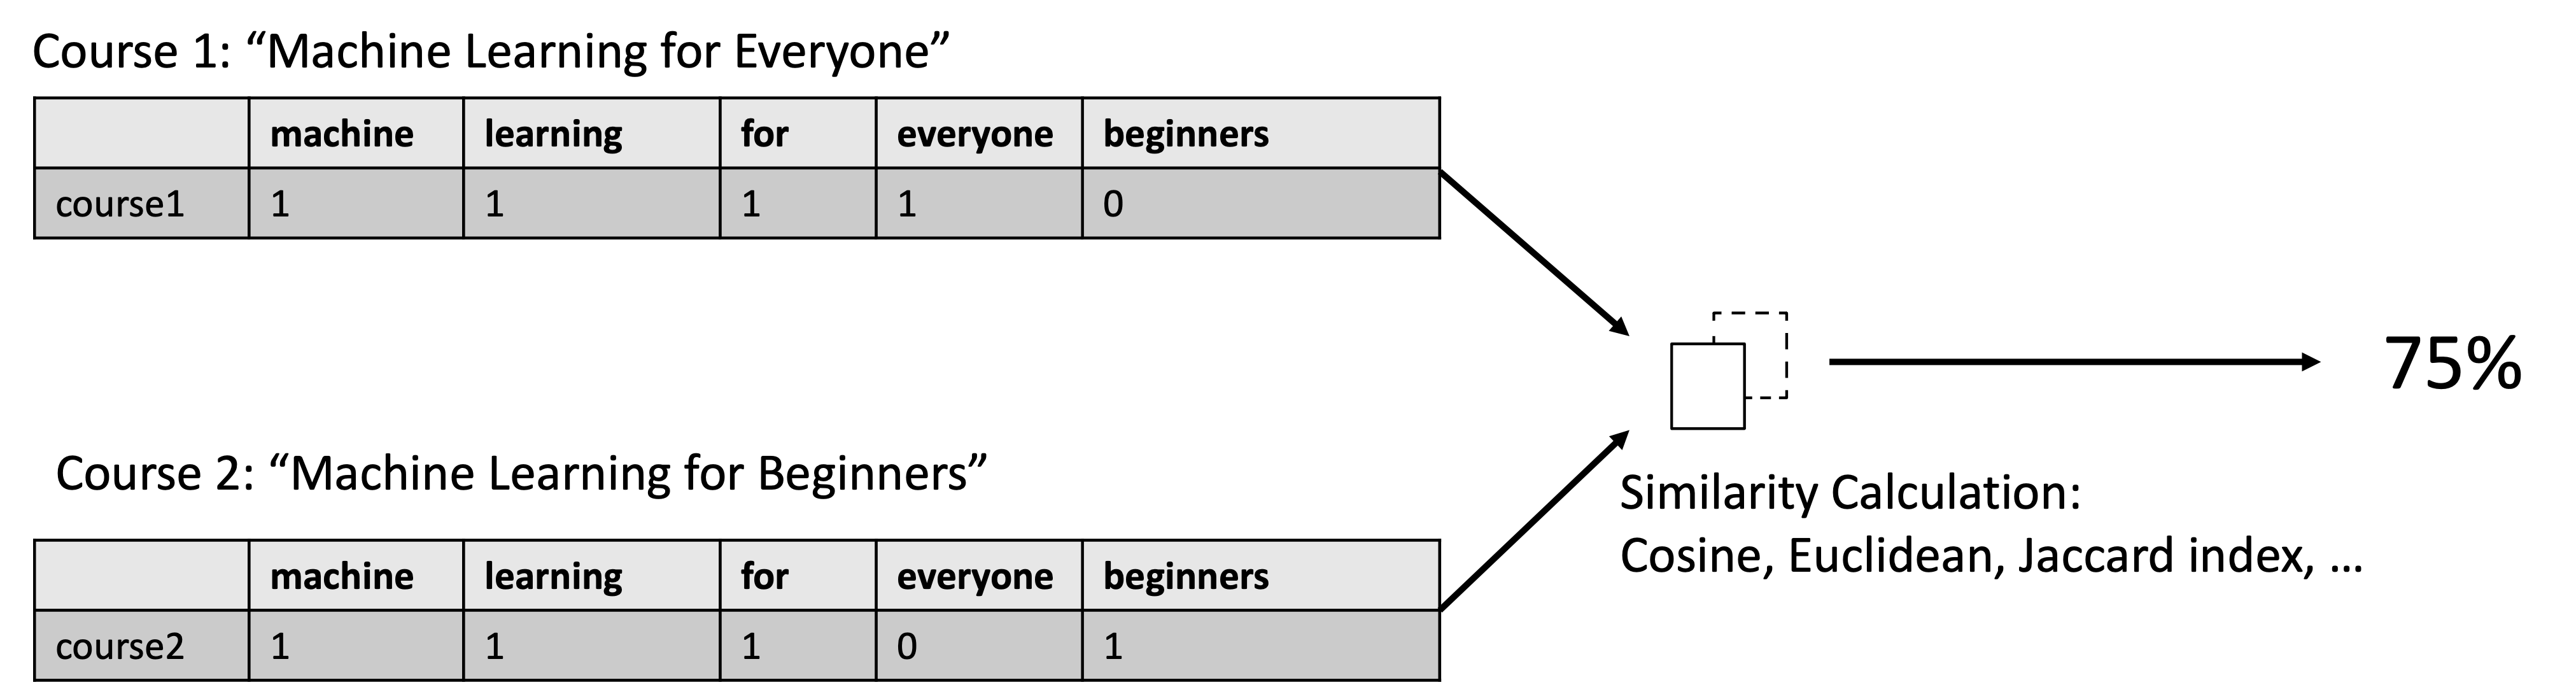

### Prepare and setup lab environment

In [1]:
# First let's install and import required libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import pandas as pd
import nltk as nltk

from scipy.spatial.distance import cosine
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from gensim import corpora

%matplotlib inline

In [2]:
# Set a random state
rs = 123

### Calculate the consine similarity between two example courses

Suppose we have two simple example courses:

In [3]:
course1 = "machine learning for everyone"
course2 = "machine learning for beginners"

Next we can quickly tokenize them using the split() method (or using word_tokenize() method provided in nltk as we did in the previous lab).

In [4]:
tokens = set(course1.split() + course2.split())
tokens = list(tokens)
tokens

['beginners', 'for', 'machine', 'learning', 'everyone']

Then generate BoW features (token counts) for these two courses (or using tokens_dict.doc2bow() method provided in nltk, similar to what we did in the previous lab).

In [5]:
def generate_sparse_bow(course):
    bow_vector = []
    words = course.split()
    for token in tokens:
        if token in words:
            bow_vector.append(1)
        else:
            bow_vector.append(0)
    return bow_vector

In [6]:
bow1 = generate_sparse_bow(course1)
bow1

[0, 1, 1, 1, 1]

In [7]:
bow2 = generate_sparse_bow(course2)
bow2

[1, 1, 1, 1, 0]

From the above cell outputs, we can see the two vectors are very similar. Only two dimensions are different. Now we can quickly apply the cosine similarity measurement on the two vectors:

In [8]:
cos_sim = 1 - cosine(bow1, bow2)

In [9]:
print(f"The cosine similarity between course `{course1}` and course `{course2}` is {round(cos_sim, 2) * 100}%")

The cosine similarity between course `machine learning for everyone` and course `machine learning for beginners` is 75.0%


### An alternative approach to calculate the cosine similarity. 

In [10]:
# Create a helper function

import math
from collections import Counter

def cosine_similarity(str1, str2):
    # Convert the strings to lowercase and split into words
    words1 = str1.lower().split()
    words2 = str2.lower().split()

    # Create word frequency dictionaries for both strings
    freq1 = Counter(words1)
    freq2 = Counter(words2)

    # Create a set of all unique words
    unique_words = set(words1 + words2)

    # Calculate the dot product
    dot_product = sum(freq1[word] * freq2[word] for word in unique_words)

    # Calculate the magnitudes
    mag1 = math.sqrt(sum(freq1[word] ** 2 for word in unique_words))
    mag2 = math.sqrt(sum(freq2[word] ** 2 for word in unique_words))

    # Calculate the cosine similarity
    similarity = dot_product / (mag1 * mag2)

    return similarity

In [11]:
# Test the function

course1 = "machine learning for everyone"
course2 = "machine learning for beginners"
similarity = cosine_similarity(course1, course2)
print(f"The cosine similarity between course `{course1}` and course `{course2}` is {round(cos_sim, 2) * 100}%")

The cosine similarity between course `machine learning for everyone` and course `machine learning for beginners` is 75.0%


When the cosine_similarity function is run, it will output the cosine similarity between the two course titles. The cosine similarity ranges from -1 to 1, with 1 indicating identical strings and -1 indicating completely dissimilar strings. In this case, since the course titles are similar, you can expect the cosine similarity to be relatively high.

### Practice: Try other similarity measurements such as Euclidean Distance or Jaccard index._

### Calculating similarity using Euclidean Distance
The code that follows creates a helper function that will s a helper function that will output the Euclidean distance between the two strings. The lower the distance, the more similar the strings are. In this case, since the strings are quite similar, you can expect the Euclidean distance to be relatively small.

First the code converts the strings (words1, words2) into lowercase and splits them into words to calculate the word frequencies. This approach treats words with different capitalization as the same and ignores punctuation. Then the function creates a set of unique words and after that, the script creates two dictionaries to store the word frequencies for each string. Then the function (lines 18-21) iterates through both dictionaries to count how many times a given word is a given dictionary. Lastly, the function computes and returns the Euclidean distance.

In [12]:
# WRITE A HELPER FUNCTION TO CALCULATE THE EUCLIDEAN DISTANCE

import math

def euclidean_distance(str1, str2):
    # Convert the strings to lowercase and split into words
    words1 = str1.lower().split()
    words2 = str2.lower().split()

    # Create a set of all unique words
    unique_words = set(words1 + words2)

    # Create a dictionary to store the word frequencies for each string
    freq1 = {word: 0 for word in unique_words}
    freq2 = {word: 0 for word in unique_words}

    # Count the word frequencies in each string
    for word in words1:
        freq1[word] += 1
    for word in words2:
        freq2[word] += 1

    # Calculate the Euclidean distance
    distance = 0
    for word in unique_words:
        distance += (freq1[word] - freq2[word]) ** 2
    distance = math.sqrt(distance)

    return distance

In [13]:
# Test the function

str1 = "machine learning for everyone"
str2 = "machine learning for beginners"
distance = euclidean_distance(str1, str2)
print("Euclidean distance:", distance)

Euclidean distance: 1.4142135623730951


### TASK: Find similar courses to the course Machine Learning with Python
Now you have learned how to calculate cosine similarity between two sample BoW feature vectors. Let's work on some real course BoW feature vectors.

In [14]:
# Load the BoW features as Pandas dataframe

bows_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bows_df = pd.read_csv(bows_url)
bows_df = bows_df[['doc_id', 'token', 'bow']]

In [15]:
bows_df.shape

(10366, 3)

In [16]:
bows_df.head(10)

,doc_id,token,bow
0,ML0201EN,ai,2
1,ML0201EN,apps,2
2,ML0201EN,build,2
3,ML0201EN,cloud,1
4,ML0201EN,coming,1
5,ML0201EN,create,1
6,ML0201EN,data,1
7,ML0201EN,developer,1
8,ML0201EN,found,1
9,ML0201EN,fun,1


The bows_df dataframe contains the BoW features vectors for each course, in a vertical and dense format. It has three columns doc_id represents the course id, token represents the token value, and bow represents the BoW value (token count). Then, let's load another course content dataset which contains the course title and description:

In [17]:
# Load the course dataframe

course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)

In [18]:
course_df.head(10)

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
5,CNSC02EN,cloud native security conference data security,introduction to data security on cloud
6,DX0106EN,data science bootcamp with r for university pr...,a multi day intensive in person data science ...
7,GPXX0FTCEN,learn how to use docker containers for iterati...,learn how to use docker containers for iterati...
8,RAVSCTEST1,scorm test 1,scron test course
9,GPXX06RFEN,create your first mongodb database,in this guided project you will get started w...


Let's find out its title and description for course ID ML0101ENv3:

In [19]:
course_df[course_df['COURSE_ID'] == 'ML0101ENv3']

,COURSE_ID,TITLE,DESCRIPTION
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...


We can see it is a machine learning with Python course so we can expect any machine learning or Python related courses would be similar. Then, let's print its associated BoW features:

In [20]:
ml_course = bows_df[bows_df['doc_id'] == 'ML0101ENv3']
ml_course

,doc_id,token,bow
2747,ML0101ENv3,course,1
2748,ML0101ENv3,learning,4
2749,ML0101ENv3,machine,3
2750,ML0101ENv3,need,1
2751,ML0101ENv3,get,1
2752,ML0101ENv3,started,1
2753,ML0101ENv3,python,2
2754,ML0101ENv3,tool,1
2755,ML0101ENv3,tools,1
2756,ML0101ENv3,predict,1


We can see the BoW feature vector is in vertical format but normally feature vectors are in horizontal format. One way to transpose the feature vector from vertical to horizontal is to use the Pandas pivot() method:

In [21]:
ml_courseT = ml_course.pivot(index=['doc_id'], columns='token').reset_index(level=[0])
ml_courseT

doc_id        bow                                              \
token             beneficial course free future get give hidden insights   
0      ML0101ENv3          1      1    1      1   1    1      1        1   

                                                                          \
token learning machine need predict python started supervised tool tools   
0            4       3    1       1      2       1          1    1     1   

                           
token trends unsupervised  
0          1            1

o compare the BoWs of any two courses, which normally have a different set of tokens, we need to create a union token set and then transpose them. We have provided a method called pivot_two_bows as follows:

In [22]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # Append the two token sets vertically
    join = base.append(compare)
    # Pivot the two joined courses
    joinT = join.pivot(index=['doc_id', 'type'], columns='token').fillna(0).reset_index(level=[0, 1])
    # Assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [23]:
course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
course2 = bows_df[bows_df['doc_id'] == 'ML0101ENv3']

In [24]:
bow_vectors = pivot_two_bows(course1, course2)
bow_vectors

C:\Users\hp\AppData\Local\Temp\ipykernel_30716\2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)


,doc_id,type,approachable,basics,beneficial,comparison,course,dives,free,future,...,relates,started,statistical,supervised,tool,tools,trends,unsupervised,using,vs
0,ML0101ENv3,compare,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ML0151EN,base,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


Similarly, we can use the cosine method to calculate their similarity:

In [25]:
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
similarity

0.6626221399549089

Now it's your turn to perform a task of finding all courses similar to the course Machine Learning with Python:

In [26]:
course_df[course_df['COURSE_ID'] == 'ML0101ENv3']

,COURSE_ID,TITLE,DESCRIPTION
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...


You can set a similarity threshold such as 0.5 to determine if two courses are similar enough.

#### TODO: Find courses which are similar to course Machine Learning with Python (ML0101ENv3), you also need to show the title and descriptions of those courses.

In [ ]:
# WRITE YOUR CODE HERE

## For each course other than ML0101ENv3, use pivot_course_rows to convert it with course ML0101ENv3 into horizontal two BoW feature vectors
## Then use the cosine method to calculate the similarity
## Report all courses with similarities larger than a specific threshold (such as 0.5)


**Hints**

You can use bows_df[bows_df['doc_id'] == 'ML0101ENv3'] to find 'ML0101ENv3' course bow. Then in a similar matter you can find bows for each course_id that's not 'ML0101ENv3'. Then you can join 2 bows by using predefined pivot_two_bows function and calculate the similarity as we just did using the cosine method. Print the course ids with similarity>0.5

#### Summary

Congratulations, you have finished the course similarity lab. In this lab, you used cosine and course BoW features to calculate the similarities among courses. Such similarity measurement is the core of many content-based recommender systems, which you will learn and practice in the later labs.